In [1]:
import numpy as np
import keras
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


# Iris dataset

### Dataset load and setting

In [2]:
# create object of class 'load_iris'
iris = load_iris()

In [41]:
# save features and targets from the 'iris'
features, targets = iris.data, iris.target


### Dataset Split into:
Train, test and validation

In [42]:
# Split: train_size=0.8 and test_size=0.2
# in a second split the test size will be split into two. 
# It will be 0.1 to test set  and 0.1 to validation set  
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

In [43]:
 class_number = len(np.unique(targets))

In [44]:
# amount of classes to the problem
class_number

3

In [45]:
test_features.shape

(30, 4)

In [46]:
train_features.shape

(120, 4)

## Amount of half of the test's first split

In [47]:
half_test_samples = int((len(test_features))/2)

### Split of the test set into half

In [48]:
val_features = test_features[:half_test_samples]

In [49]:
val_features.shape

(15, 4)

In [50]:
val_targets = test_targets[:half_test_samples]

### Test set now is it's half size

In [51]:
test_features = test_features[half_test_samples:]

In [52]:
test_features.shape

(15, 4)

In [53]:
test_targets = test_targets[half_test_samples:]

In [54]:
test_targets

array([1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1])

In [57]:
test_targets_metrics = test_targets

## Model Creation

In [108]:
def create_MLP_model(classes_number):
    """
    Function to create a MLP model
    classes_number: Number of classes to be classified
    
    return model - model to be used in the training stage
    """
    input_dim = 4
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    return model

## Encoding classes

In [59]:
train_targets = keras.utils.np_utils.to_categorical(train_targets, class_number)
test_targets = keras.utils.np_utils.to_categorical(test_targets, class_number)
val_targets = keras.utils.np_utils.to_categorical(val_targets, class_number)

### Model compilation

In [60]:
model = create_MLP_model(class_number)

In [61]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer=SGD(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [63]:
#variables and constants to the model training
callbacks_list = []
path_to_save_model = "model/best_model.h5"



### Callbacks

In [64]:
#model checkpoint to save just the best model with the lowest loss
model_checkpoint = ModelCheckpoint(path_to_save_model,
                                   monitor='val_loss',
                                   verbose=2,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

callbacks_list.append(model_checkpoint)

In [65]:
early_stop_callback = EarlyStopping(monitor='val_loss',
                                    min_delta=0,  
                                    patience=10,
                                    verbose=2,
                                    mode='auto',
                                    baseline=None,
                                    restore_best_weights=False)

callbacks_list.append(early_stop_callback)

In [78]:
history = model.fit(train_features,
                    train_targets,
                    batch_size=32,
                    epochs=300,
                    verbose=2,
                    callbacks = callbacks_list,
                    validation_data=(val_features, val_targets))

Train on 120 samples, validate on 15 samples
Epoch 1/300
 - 0s - loss: 0.3775 - acc: 0.8583 - val_loss: 0.3157 - val_acc: 0.9333

Epoch 00001: val_loss did not improve from 0.27497
Epoch 2/300
 - 0s - loss: 0.3730 - acc: 0.8417 - val_loss: 0.3003 - val_acc: 0.9333

Epoch 00002: val_loss did not improve from 0.27497
Epoch 3/300
 - 0s - loss: 0.3627 - acc: 0.9083 - val_loss: 0.2683 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.27497 to 0.26833, saving model to model/best_model.h5
Epoch 4/300
 - 0s - loss: 0.3436 - acc: 0.8917 - val_loss: 0.2927 - val_acc: 0.9333

Epoch 00004: val_loss did not improve from 0.26833
Epoch 5/300
 - 0s - loss: 0.3554 - acc: 0.8833 - val_loss: 0.3011 - val_acc: 0.9333

Epoch 00005: val_loss did not improve from 0.26833
Epoch 6/300
 - 0s - loss: 0.3455 - acc: 0.9083 - val_loss: 0.2660 - val_acc: 1.0000

Epoch 00006: val_loss improved from 0.26833 to 0.26597, saving model to model/best_model.h5
Epoch 7/300
 - 0s - loss: 0.3269 - acc: 0.8417 - val_loss

 - 0s - loss: 0.3061 - acc: 0.8667 - val_loss: 0.2097 - val_acc: 0.9333

Epoch 00056: val_loss did not improve from 0.18364
Epoch 57/300
 - 0s - loss: 0.3033 - acc: 0.9000 - val_loss: 0.2185 - val_acc: 0.9333

Epoch 00057: val_loss did not improve from 0.18364
Epoch 58/300
 - 0s - loss: 0.2837 - acc: 0.8750 - val_loss: 0.1937 - val_acc: 1.0000

Epoch 00058: val_loss did not improve from 0.18364
Epoch 59/300
 - 0s - loss: 0.2522 - acc: 0.9417 - val_loss: 0.1825 - val_acc: 1.0000

Epoch 00059: val_loss improved from 0.18364 to 0.18254, saving model to model/best_model.h5
Epoch 60/300
 - 0s - loss: 0.2531 - acc: 0.9333 - val_loss: 0.1855 - val_acc: 1.0000

Epoch 00060: val_loss did not improve from 0.18254
Epoch 61/300
 - 0s - loss: 0.2878 - acc: 0.9000 - val_loss: 0.2010 - val_acc: 0.9333

Epoch 00061: val_loss did not improve from 0.18254
Epoch 62/300
 - 0s - loss: 0.2578 - acc: 0.9167 - val_loss: 0.1796 - val_acc: 1.0000

Epoch 00062: val_loss improved from 0.18254 to 0.17959, saving m

### Test saved model

In [79]:
model = load_model(path_to_save_model)

In [80]:
_, accuracy = model.evaluate(test_features, test_targets)

15/15 [==============================] - 0s 6ms/step


In [81]:
predictions = model.predict(test_features)

In [82]:
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 93.33


### Confusion Matrix

In [83]:
confusion_matrix(test_targets.argmax(axis=1), predictions.argmax(axis=1))

array([[5, 0, 0],
       [0, 5, 1],
       [0, 0, 4]])

### Other metrics of the model
Precision, recall and f1-score

In [84]:
print(classification_report(test_targets_metrics,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.83      0.91         6
           2       0.80      1.00      0.89         4

   micro avg       0.93      0.93      0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.95      0.93      0.93        15



### Accuracy and Loss plot

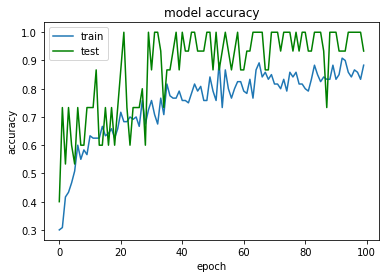

In [76]:
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], 'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accurary_1.png')

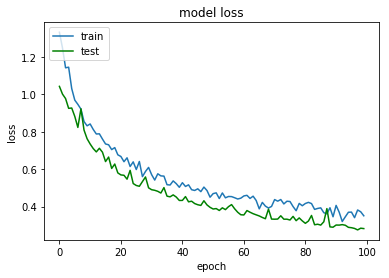

In [77]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_loss_1.png')

## Segunda abordagem: mais camadas escondidas no modelo

In [99]:
def create_MLP_model(classes_number):
    """
    Function to create a MLP model
    classes_number: Number of classes to be classified
    
    return model - model to be used in the training stage
    """
    input_dim = 4
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=input_dim, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=input_dim, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))

    return model

In [100]:
model2 = create_MLP_model(class_number)

In [101]:
 model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 195       
Total params: 8,835
Trainable params: 8,835
Non-trainable params: 0
_________________________________________________________________


In [102]:
path_to_save_model2 = "model/best_model2.h5"

In [106]:
model2.compile(optimizer=SGD(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
history = model2.fit(train_features,
                    train_targets,
                    batch_size=32,
                    epochs=300,
                    verbose=2,
                    validation_data=(val_features, val_targets))

Train on 120 samples, validate on 15 samples
Epoch 1/300
 - 1s - loss: 0.3146 - acc: 0.8750 - val_loss: 0.1729 - val_acc: 0.9333
Epoch 2/300
 - 0s - loss: 0.3495 - acc: 0.8583 - val_loss: 0.1623 - val_acc: 1.0000
Epoch 3/300
 - 0s - loss: 0.3127 - acc: 0.8833 - val_loss: 0.1615 - val_acc: 1.0000
Epoch 4/300
 - 0s - loss: 0.3325 - acc: 0.8417 - val_loss: 0.1580 - val_acc: 1.0000
Epoch 5/300
 - 0s - loss: 0.3185 - acc: 0.8750 - val_loss: 0.1529 - val_acc: 1.0000
Epoch 6/300
 - 0s - loss: 0.3134 - acc: 0.8417 - val_loss: 0.1493 - val_acc: 1.0000
Epoch 7/300
 - 0s - loss: 0.2699 - acc: 0.8667 - val_loss: 0.1450 - val_acc: 1.0000
Epoch 8/300
 - 0s - loss: 0.3562 - acc: 0.8417 - val_loss: 0.1425 - val_acc: 1.0000
Epoch 9/300
 - 0s - loss: 0.2399 - acc: 0.9000 - val_loss: 0.1421 - val_acc: 1.0000
Epoch 10/300
 - 0s - loss: 0.2668 - acc: 0.9083 - val_loss: 0.1411 - val_acc: 1.0000
Epoch 11/300
 - 0s - loss: 0.3519 - acc: 0.8333 - val_loss: 0.1421 - val_acc: 1.0000
Epoch 12/300
 - 0s - loss: 0.

Epoch 97/300
 - 0s - loss: 0.2751 - acc: 0.9167 - val_loss: 0.1374 - val_acc: 1.0000
Epoch 98/300
 - 0s - loss: 0.2477 - acc: 0.9417 - val_loss: 0.1357 - val_acc: 1.0000
Epoch 99/300
 - 0s - loss: 0.3417 - acc: 0.8250 - val_loss: 0.1352 - val_acc: 1.0000
Epoch 100/300
 - 0s - loss: 0.3010 - acc: 0.8667 - val_loss: 0.1359 - val_acc: 1.0000
Epoch 101/300
 - 0s - loss: 0.3117 - acc: 0.8667 - val_loss: 0.1341 - val_acc: 1.0000
Epoch 102/300
 - 0s - loss: 0.2915 - acc: 0.8750 - val_loss: 0.1331 - val_acc: 1.0000
Epoch 103/300
 - 0s - loss: 0.2992 - acc: 0.8833 - val_loss: 0.1318 - val_acc: 1.0000
Epoch 104/300
 - 0s - loss: 0.2281 - acc: 0.9333 - val_loss: 0.1314 - val_acc: 1.0000
Epoch 105/300
 - 0s - loss: 0.2805 - acc: 0.9000 - val_loss: 0.1321 - val_acc: 1.0000
Epoch 106/300
 - 0s - loss: 0.3336 - acc: 0.8667 - val_loss: 0.1334 - val_acc: 1.0000
Epoch 107/300
 - 0s - loss: 0.2349 - acc: 0.9083 - val_loss: 0.1312 - val_acc: 1.0000
Epoch 108/300
 - 0s - loss: 0.3163 - acc: 0.8500 - val_lo

Epoch 193/300
 - 0s - loss: 0.2992 - acc: 0.8750 - val_loss: 0.1307 - val_acc: 1.0000
Epoch 194/300
 - 0s - loss: 0.2856 - acc: 0.9083 - val_loss: 0.1313 - val_acc: 1.0000
Epoch 195/300
 - 0s - loss: 0.3166 - acc: 0.8500 - val_loss: 0.1296 - val_acc: 1.0000
Epoch 196/300
 - 0s - loss: 0.2903 - acc: 0.8417 - val_loss: 0.1294 - val_acc: 1.0000
Epoch 197/300
 - 0s - loss: 0.2631 - acc: 0.9000 - val_loss: 0.1272 - val_acc: 1.0000
Epoch 198/300
 - 0s - loss: 0.3063 - acc: 0.8667 - val_loss: 0.1303 - val_acc: 1.0000
Epoch 199/300
 - 0s - loss: 0.3824 - acc: 0.8083 - val_loss: 0.1292 - val_acc: 1.0000
Epoch 200/300
 - 0s - loss: 0.2880 - acc: 0.8917 - val_loss: 0.1281 - val_acc: 1.0000
Epoch 201/300
 - 0s - loss: 0.3428 - acc: 0.8250 - val_loss: 0.1265 - val_acc: 1.0000
Epoch 202/300
 - 0s - loss: 0.3160 - acc: 0.8750 - val_loss: 0.1304 - val_acc: 1.0000
Epoch 203/300
 - 0s - loss: 0.3452 - acc: 0.8500 - val_loss: 0.1322 - val_acc: 1.0000
Epoch 204/300
 - 0s - loss: 0.2306 - acc: 0.9250 - val

Epoch 289/300
 - 0s - loss: 0.2911 - acc: 0.9083 - val_loss: 0.1220 - val_acc: 1.0000
Epoch 290/300
 - 0s - loss: 0.2458 - acc: 0.9000 - val_loss: 0.1238 - val_acc: 1.0000
Epoch 291/300
 - 0s - loss: 0.2426 - acc: 0.9083 - val_loss: 0.1224 - val_acc: 1.0000
Epoch 292/300
 - 0s - loss: 0.2835 - acc: 0.8667 - val_loss: 0.1273 - val_acc: 1.0000
Epoch 293/300
 - 0s - loss: 0.3151 - acc: 0.8917 - val_loss: 0.1255 - val_acc: 1.0000
Epoch 294/300
 - 0s - loss: 0.2535 - acc: 0.9000 - val_loss: 0.1244 - val_acc: 1.0000
Epoch 295/300
 - 0s - loss: 0.2459 - acc: 0.9083 - val_loss: 0.1233 - val_acc: 1.0000
Epoch 296/300
 - 0s - loss: 0.2783 - acc: 0.8917 - val_loss: 0.1220 - val_acc: 1.0000
Epoch 297/300
 - 0s - loss: 0.2344 - acc: 0.9417 - val_loss: 0.1215 - val_acc: 1.0000
Epoch 298/300
 - 0s - loss: 0.2684 - acc: 0.8833 - val_loss: 0.1209 - val_acc: 1.0000
Epoch 299/300
 - 0s - loss: 0.2261 - acc: 0.9167 - val_loss: 0.1221 - val_acc: 1.0000
Epoch 300/300
 - 0s - loss: 0.2706 - acc: 0.9000 - val